# Mall Customer Segmentation - KMeans Strategy

### Problem Statement
- You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

### Steps :
- Importing Libraries.
##### EDA
- Exploratory Data Analisys
##### ML
- Clustering using K-Means.
- Selection of Clusters.
- Ploting the Cluster Boundry and Clusters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d  import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm

In [2]:
data = pd.read_csv('customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape # Data Format

(200, 5)

In [5]:
data.isnull().sum() # Verify is not missing any value

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


###### Hmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm

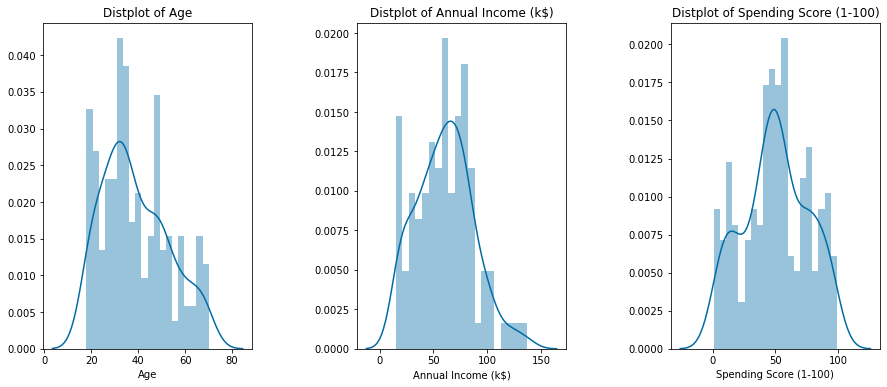

In [7]:
plt.style.use('tableau-colorblind10')
plt.figure(1 , figsize = (15 , 6))
plt.subplot(1 , 3 , 1)
plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
sns.distplot(data['Age'] , bins = 20)
plt.title('Distplot of {}'.format('Age'))
plt.subplot(1 , 3 , 2)
plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
sns.distplot(data['Annual Income (k$)'] , bins = 20)
plt.title('Distplot of {}'.format('Annual Income (k$)'))
plt.subplot(1 , 3 , 3)
plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
sns.distplot(data['Spending Score (1-100)'] , bins = 20)
plt.title('Distplot of {}'.format('Spending Score (1-100)'))
plt.show()

In [8]:
female = data[data['Gender'] == 'Female']['Gender']
male = data[data['Gender'] == 'Male']['Gender']

Female:  112
Male:  88


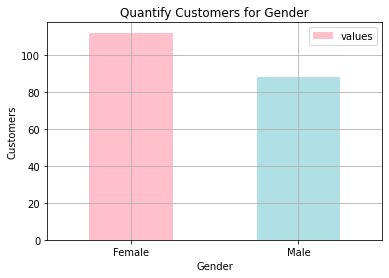

In [9]:
df_gender = pd.DataFrame({'values': [len(female),len(male)], 'index': ['Female','Male']})
fig_gender = df_gender.plot.bar( y= 'values', x = 'index' , rot = 0 , color = ['pink','powderblue'])
plt.title('Quantify Customers for Gender')
fig_gender.grid( zorder = 0 )
fig_gender.set_xlabel('Gender')
fig_gender.set_ylabel('Customers')

print('Female: ',len(female))
print('Male: ',len(male))

## Clustering

In [35]:
feature = data.iloc[:,[3,4]].values
wcss = []

In [36]:
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(feature)
    wcss.append(kmeans.inertia_)

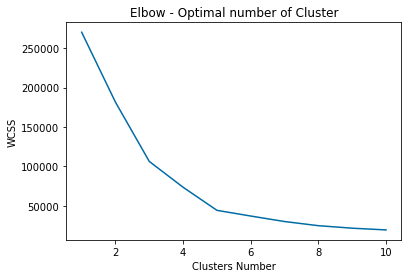

In [37]:
plt.plot(range(1,11), wcss)
plt.title('Elbow - Optimal number of Cluster')
plt.xlabel('Clusters Number')
plt.ylabel('WCSS')
plt.show()

In [81]:
# The elbow method is a way to find an optimal number of clusters to understand your segmentation.
# For the elbow method k=5 clusters looks good

In [82]:
kmeans = KMeans(n_clusters= 5, init='k-means++', random_state=0)
ykmeans= kmeans.fit_predict(feature)

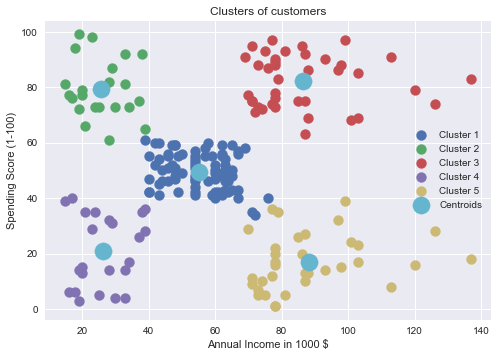

In [83]:
plt.style.use('seaborn')
plt.scatter( feature[ykmeans == 0, 0] , feature[ykmeans == 0, 1] , s = 100, label = 'Cluster 1')
plt.scatter( feature[ykmeans == 1, 0] , feature[ykmeans == 1, 1] , s = 100,  label = 'Cluster 2')
plt.scatter( feature[ykmeans == 2, 0] , feature[ykmeans == 2, 1] , s = 100,  label = 'Cluster 3')
plt.scatter( feature[ykmeans == 3, 0] , feature[ykmeans == 3, 1] , s = 100, label = 'Cluster 4')
plt.scatter( feature[ykmeans == 4, 0] , feature[ykmeans == 4, 1] , s = 100, label = 'Cluster 5')
plt.scatter( kmeans.cluster_centers_[:, 0] , kmeans.cluster_centers_[:, 1] , s = 300,  label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income in 1000 $')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [84]:
for i in range(0,5):
    print( 'Cluster',(i+1),'proportion: ',len(feature[ykmeans == i]),'or',(len(feature[ykmeans == i])/len(feature[ykmeans]))*100,'%')    

Cluster 1 proportion:  81 or 40.5 %
Cluster 2 proportion:  22 or 11.0 %
Cluster 3 proportion:  39 or 19.5 %
Cluster 4 proportion:  23 or 11.5 %
Cluster 5 proportion:  35 or 17.5 %


In my business, my focus would be on customer segment 3, later on segment 1, considering its proportion in the spectrum. Primarily.
